In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [2]:
files = glob.glob(f"/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-GHG/r1i1p1f1/Amon/hur/gn/latest/*.nc")
hur = xr.open_mfdataset(files)

/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hur' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hur' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hur' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hur' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [3]:
hur_timeseries = hur.mean(['lat', 'lon'])
hur_timeseries

<xarray.Dataset>
Dimensions:    (time: 1986, plev: 19, nbnd: 2)
Coordinates:
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2015-06-15 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hur        (time, plev) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, nbnd) float64 dask.array<chunksize=(600, 2), meta=np.ndarray>
    lon_bnds   (time, nbnd) float64 dask.array<chunksize=(600, 2), meta=np.ndarray>

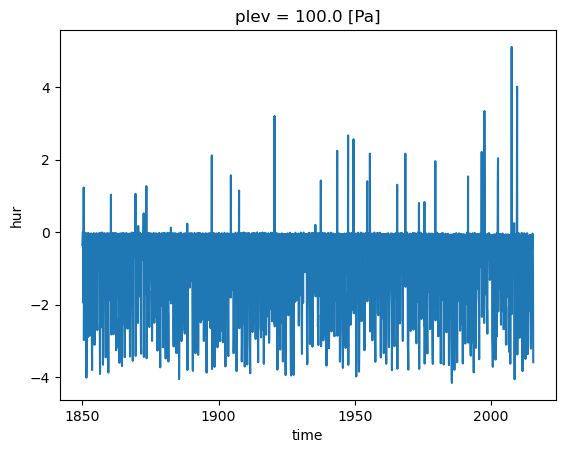

In [23]:
hur_timeseries.sel(plev=100)['hur'].plot()

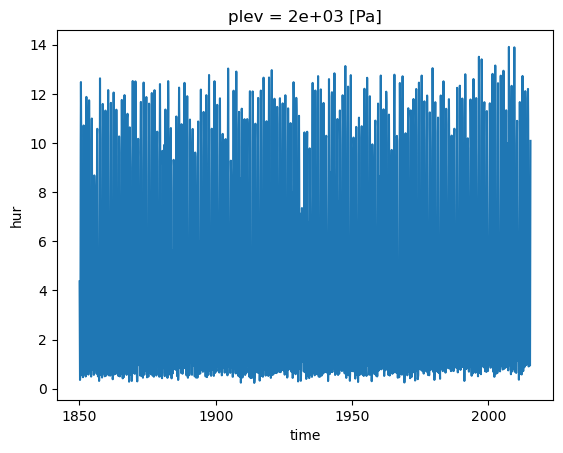

In [21]:
hur_timeseries.sel(plev=2000)['hur'].plot()

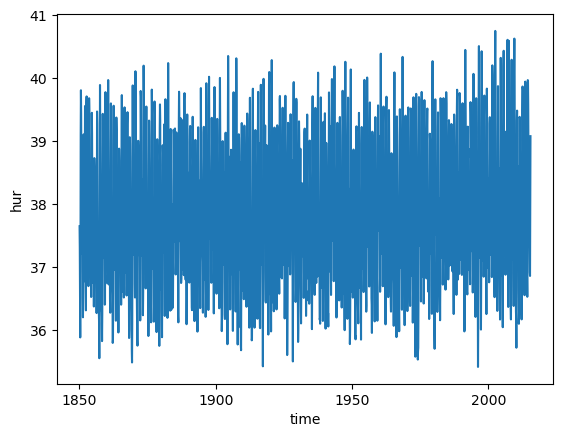

In [22]:
time_data = hur_timeseries.mean(['plev'])['hur']
time_data.plot()

In [4]:
files = glob.glob(f"/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-GHG/r1i1p1f1/Amon/ta/gn/latest/*.nc")
ta = xr.open_mfdataset(files)
ta_timeseries = ta.mean(['lat','lon'])
ta_timeseries

/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (time: 1986, plev: 19, nbnd: 2)
Coordinates:
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time       (time) object 1850-01-15 12:00:00 ... 2015-06-15 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    ta         (time, plev) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, nbnd) float64 dask.array<chunksize=(600, 2), meta=np.ndarray>
    lon_bnds   (time, nbnd) float64 dask.array<chunksize=(600, 2), meta=np.ndarray>

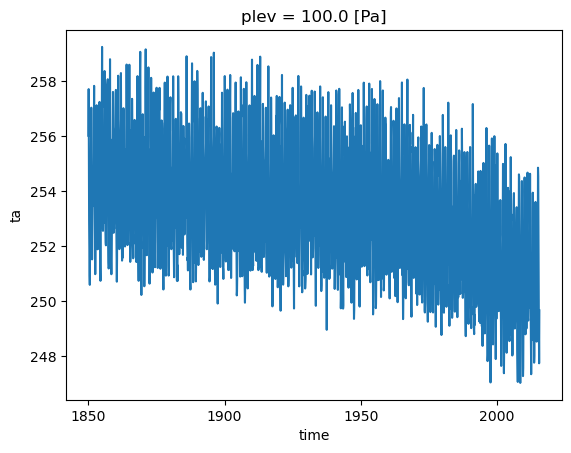

In [27]:
ta_timeseries.sel(plev=100)['ta'].plot()

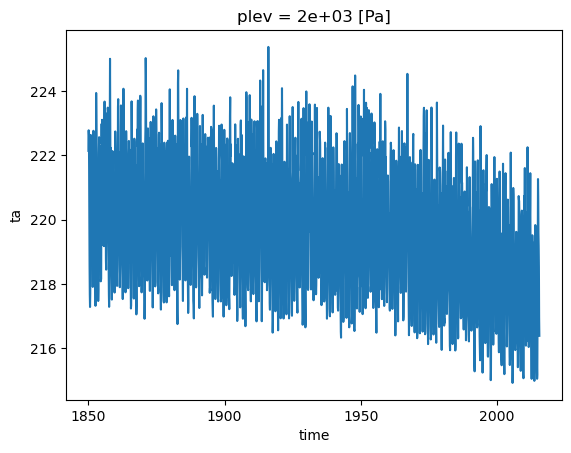

In [28]:
ta_timeseries.sel(plev=2000)['ta'].plot()

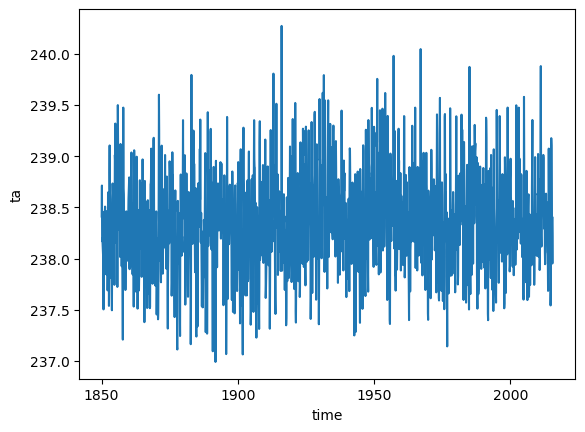

In [30]:
time_data_ta = ta_timeseries.mean(['plev'])['ta']
time_data_ta.plot()

In [5]:
# Calculate 610.78 x e^(T / (T +237.3) x 17.2694) to find the saturation vapor pressure. Then calculate SVP x (1 – RH/100) = VPD to find vapor pressure deficit.

In [6]:
#/glade/u/home/duncanwp/work/ClimateBench/outputs_historical.nc


In [9]:
time_data

<xarray.DataArray 'hur' (time: 1986)>
dask.array<getitem, shape=(1986,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    plev     float64 100.0
  * time     (time) object 1850-01-15 12:00:00 ... 2015-06-15 00:00:00

In [14]:
hur_timeseries['hur'].compute()

<xarray.DataArray 'hur' (time: 1986, plev: 19)>
array([[ 8.5482887e+01,  8.6782883e+01,  7.7394859e+01, ...,
         1.7782865e+00,  3.8680550e-01, -3.5985401e-01],
       [ 8.6845879e+01,  8.7010208e+01,  7.7840027e+01, ...,
         8.6020052e-01,  1.4847183e-01, -2.3434518e-01],
       [ 8.5144173e+01,  8.4593216e+01,  7.5746216e+01, ...,
         6.9109827e-02,  1.2048144e-02, -1.0709397e-02],
       ...,
       [ 8.1490311e+01,  8.2739433e+01,  7.4280930e+01, ...,
         4.2165387e-01,  1.3304545e-01, -9.0755157e-02],
       [ 8.3624756e+01,  8.0893211e+01,  7.2386520e+01, ...,
         4.1537938e+00,  1.5189840e+00, -1.1810521e+00],
       [ 8.4664238e+01,  8.1765404e+01,  7.3809143e+01, ...,
         7.7903419e+00,  2.7341504e+00, -3.5862062e+00]], dtype=float32)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * time     (time) object 1850-01-15 12:00:00 ... 2015-06-15 00:00:00